In [18]:
!pip install pandas matplotlib seaborn geopandas
!mkdir data
!wget https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD -O data/Electric_Vehicle_Population_Data.csv

mkdir: cannot create directory ‘data’: File exists
--2024-10-31 19:10:50--  https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Resolving data.wa.gov (data.wa.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.wa.gov (data.wa.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data/Electric_Vehicle_Population_Data.csv’

data/Electric_Vehic     [ <=>                ]  49.00M  6.62MB/s    in 7.3s    

2024-10-31 19:11:00 (6.75 MB/s) - ‘data/Electric_Vehicle_Population_Data.csv’ saved [51381679]



In [19]:
import pandas as pd

df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")


df.drop_duplicates()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210160,KNDCM3LD8J,Grant,Moses Lake,WA,98837.0,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,13.0,347733676,POINT (-119.2958738 47.1384772),PUD NO 2 OF GRANT COUNTY,5.302501e+10
210161,JM3KKBHA0R,Kitsap,Bremerton,WA,98312.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,35.0,254263509,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303509e+10
210162,JTMAB3FV3P,Pierce,University Place,WA,98466.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,28.0,254488797,POINT (-122.538546 47.2298959),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
210163,5YJ3E1EA1M,King,Kirkland,WA,98034.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,137279852,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [20]:
df.isna().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [21]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})


missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)


missing_data

,Missing Values,Percentage
Legislative District,445,0.211738
Vehicle Location,10,0.004758
Electric Range,5,0.002379
Base MSRP,5,0.002379
County,4,0.001903
City,4,0.001903
Postal Code,4,0.001903
Electric Utility,4,0.001903
2020 Census Tract,4,0.001903


In [22]:
df['Legislative District'].head(5)



,Legislative District
0,35.0
1,23.0
2,1.0
3,23.0
4,45.0


## 1) Cleaning strategy:

  - The rows where are column values are null will be removed.

  - The rows where not all columns are null will use median amputation if it is a numeric value.

  - Some columns have numeric values but are indeed encoeded categorical values (such as **Legislative district**). These will use mode imputation.
  - Categorical columns will be mode imputated


In [23]:
rows_all_null = df.isnull().all(axis=1).sum()
print(f"Number of rows where all columns are null: {rows_all_null}")

Number of rows where all columns are null: 0




### 1.1 Handling Missing Values for Categorical and Encoded Categorical Features

This section outlines the strategy for dealing with missing values in features that are either categorical or encoded as categorical.

**Imputation Method:**

For these features, the **mode imputation** method will be used. This means that missing values will be replaced with the most frequent value (mode) observed in the respective feature.

**Rationale:**

Categorical features represent distinct categories or groups. Directly substituting missing values with a numerical average (e.g., mean or median) wouldn't be appropriate as it wouldn't preserve the feature's categorical nature. Mode imputation, on the other hand, ensures that the substituted value aligns with the existing categories, maintaining the feature's integrity and distribution.

**Example:**

For a feature like 'Postal Code,' which is a numeric value but possesses no meaning, computing the average would contribute nothing to the analysis. On the other hand, calculating the mode gives a sensible result.


In [24]:
columns = ['Vehicle Location', 'Legislative District', 'Postal Code', 'City', 'County', 'Electric Utility']
# Get the mode for each column. If multiple modes exist, select the first one.
max_value = df[columns].mode().iloc[0]
df[columns] = df[columns].fillna(max_value)
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


- Other numeric features such as **base MSRP**, imputing the missing values by the **median** does not cause wrong biasing of the analysis, which is why it was chosen over other methods.

- The code below imputes remaining missing values by the **median**.

In [25]:
import pandas as pd

numeric_df = df.select_dtypes(include='number')

medians = numeric_df.median()

df[numeric_df.columns] = numeric_df.fillna(medians)

df.isna().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


## 2) Encoding Categorical Features Based on Cardinality

This approach involves encoding categorical features differently based on the number of unique categories (cardinality) they contain.

**Rationale:**

- **High Cardinality Features:**  Features with a large number of unique categories (e.g., more than 3) are often best handled with label encoding. This assigns a unique numerical label to each category. While this introduces an artificial ordinal relationship between categories, it is often preferred for high-cardinality features because one-hot encoding would create an excessive number of new columns, potentially leading to the curse of dimensionality.

- **Low Cardinality Features:** Features with a small number of unique categories (e.g., less than or equal to 3) are better suited for one-hot encoding. This creates a new binary column for each category, where a 1 indicates the presence of that category and a 0 indicates its absence. One-hot encoding effectively avoids introducing artificial ordinal relationships and is often more appropriate for low-cardinality features.


**Example:**

Consider a dataset with a 'Color' feature that has values like 'Red', 'Blue', 'Green', 'Yellow', 'Orange'. Since this feature has more than 3 unique categories, label encoding would be a better choice.

- Label Encoding:
    - Red: 0
    - Blue: 1
    - Green: 2
    - Yellow: 3
    - Orange: 4

However, if we had a 'Gender' feature with values 'Male', 'Female', we would apply one-hot encoding:

- One-Hot Encoding:
    - Gender_Male: (1 if Male, 0 otherwise)
    - Gender_Female: (1 if Female, 0 otherwise)

In [26]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_copy = df.copy()

for column in df_copy.select_dtypes(include=['object']).columns:
  if df_copy[column].nunique() > 3:
    # Apply Label Encoding for categorical features with more than 3 unique values
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])
  else:
    # Apply One-Hot Encoding for categorical features with more than 3 unique values
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    feature_array = ohe.fit_transform(df_copy[[column]])
    feature_labels = [f"{column}_{class_label}" for class_label in ohe.categories_[0]]
    features_df = pd.DataFrame(feature_array, columns=feature_labels)
    df_copy = pd.concat([df_copy, features_df], axis=1)
    df_copy = df_copy.drop(column, axis=1)

df_copy.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0,3754,87,595,44,98380.0,2021,5,147,30.0,0.0,35.0,267929112,626,71,5.303509e+10,0.0,1.0,1.0,0.0,0.0
1,3875,87,524,44,98370.0,2018,36,88,215.0,0.0,23.0,475911439,575,71,5.303509e+10,1.0,0.0,1.0,0.0,0.0
2,10664,169,61,44,98012.0,2016,30,100,15.0,0.0,1.0,101971278,405,71,5.306105e+10,0.0,1.0,0.0,0.0,1.0
3,3903,87,64,44,98310.0,2018,36,88,215.0,0.0,23.0,474363746,566,71,5.303508e+10,1.0,0.0,1.0,0.0,0.0
4,1781,85,546,44,98052.0,2019,28,86,150.0,0.0,45.0,476346482,375,72,5.303303e+10,1.0,0.0,1.0,0.0,0.0


## 3) Normalization

Normalization was performed using **z-score standardization**. This involves subtracting the mean and dividing by the standard deviation for each feature, transforming the data to have a mean of 0 and a standard deviation of 1.


In [27]:
from sklearn.preprocessing import StandardScaler

# Extract the 'Census Tract' column
census_tract = df_copy['2020 Census Tract']

# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the data to fit the scaler
census_tract_reshaped = census_tract.values.reshape(-1, 1)

# Fit and transform the data to normalize it using Z-score
normalized_census_tract = scaler.fit_transform(census_tract_reshaped)

# Replace the original 'Census Tract' column with the normalized values
df_copy['2020 Census Tract new'] = normalized_census_tract
df_copy[['2020 Census Tract', '2020 Census Tract new']].head()

,2020 Census Tract,2020 Census Tract new
0,5.303509e+10,0.035964
1,5.303509e+10,0.035964
2,5.306105e+10,0.052697
3,5.303508e+10,0.035957
4,5.303303e+10,0.034637


## 4) Descriptive Statistics

Non-numeric columns and things like **Postal Code** statistics are not of interest in this case. They are dropped to leave more space to the numeric columns so as to make the table less cluttered.

In [28]:
numeric_columns = df.select_dtypes(include='number')
columns_to_drop = ['Legislative District', 'Postal Code', 'DOL Vehicle ID']
numeric_columns.drop(columns = columns_to_drop, inplace = True)
numeric_columns.describe()

,Model Year,Electric Range,Base MSRP,2020 Census Tract
count,210165.000000,210165.000000,210165.000000,2.101650e+05
mean,2021.048657,50.601037,897.655533,5.297930e+10
std,2.988941,86.972525,7653.498812,1.551452e+09
min,1999.000000,0.000000,0.000000,1.001020e+09
25%,2019.000000,0.000000,0.000000,5.303301e+10
50%,2022.000000,0.000000,0.000000,5.303303e+10
75%,2023.000000,42.000000,0.000000,5.305307e+10
max,2025.000000,337.000000,845000.000000,5.602100e+10


In [29]:
Models_by_count=df['Model'].value_counts()
Models_by_count

,count
Model,
MODEL Y,44038
MODEL 3,32520
LEAF,13606
MODEL S,7795
BOLT EV,6780
...,...
750E,2
745LE,2
PROMASTER 3500,2


<Axes: xlabel='Model'>

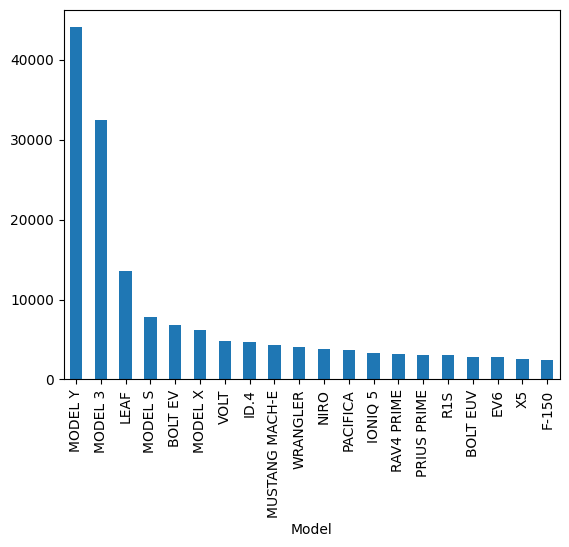

In [30]:
Models_by_count[:20].plot(kind='bar')

In [31]:
import pandas as pd

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.001291,-0.000800,-0.003409,-0.080867,0.005861,0.508744
Model Year,-0.001291,1.000000,-0.513540,-0.230651,-0.017026,0.215703,0.004709
Electric Range,-0.000800,-0.513540,1.000000,0.114157,0.019096,-0.140696,-0.000324
Base MSRP,-0.003409,-0.230651,0.114157,1.000000,0.010609,-0.039503,-0.000282
Legislative District,-0.080867,-0.017026,0.019096,0.010609,1.000000,-0.010892,-0.032681
DOL Vehicle ID,0.005861,0.215703,-0.140696,-0.039503,-0.010892,1.000000,0.003347
2020 Census Tract,0.508744,0.004709,-0.000324,-0.000282,-0.032681,0.003347,1.000000


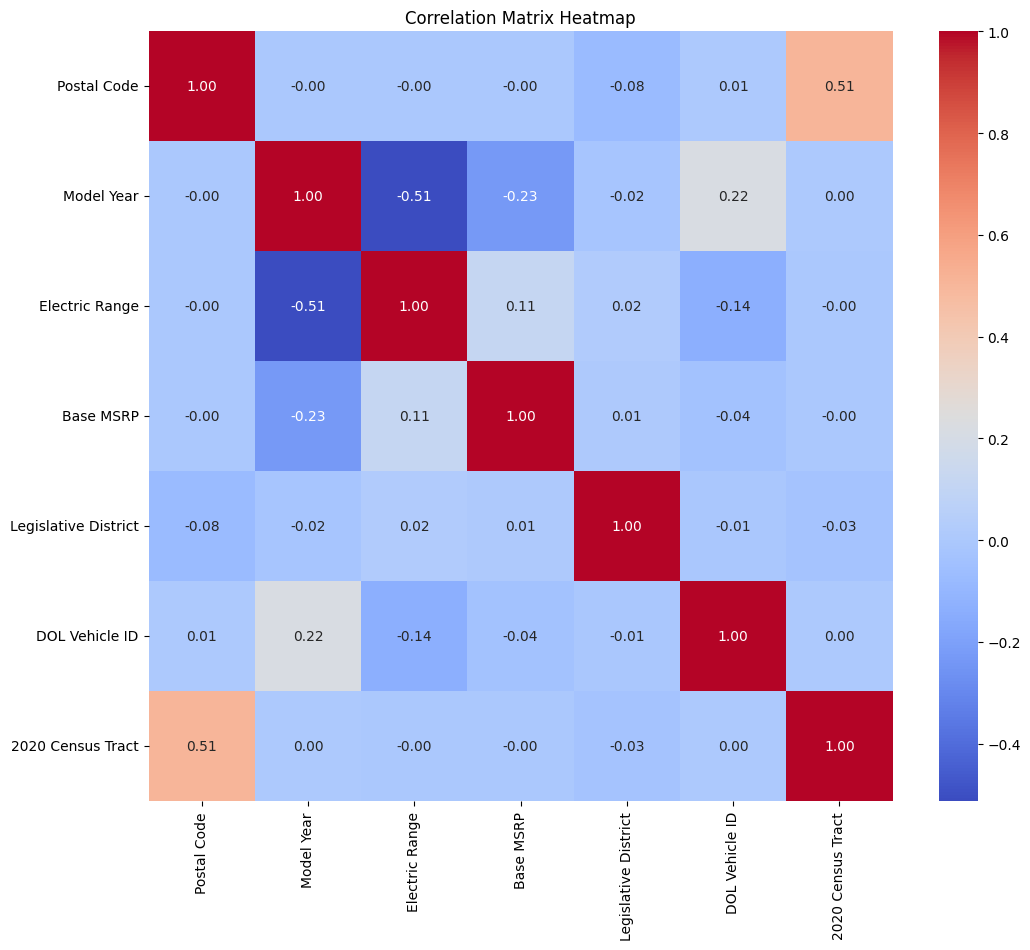

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd


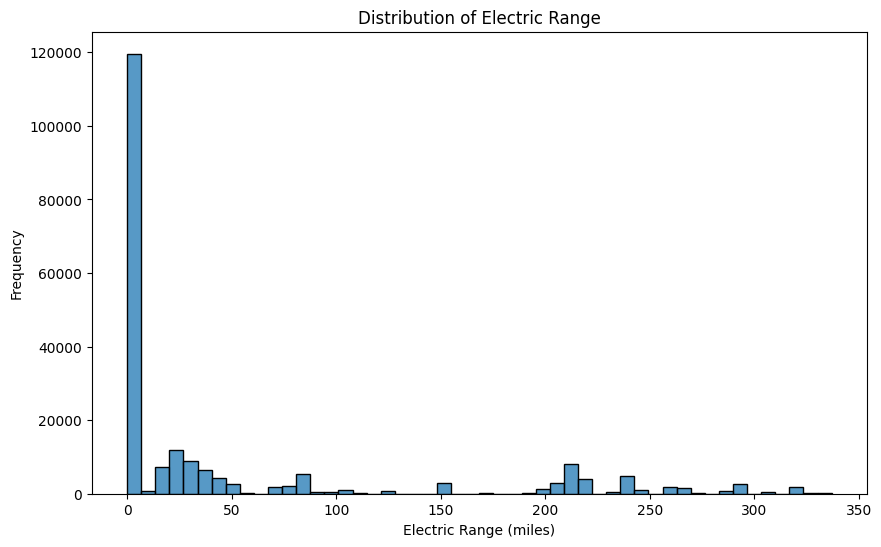

In [34]:
plt.figure(figsize=(10,6))

sns.histplot(df['Electric Range'],bins = 50)
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()

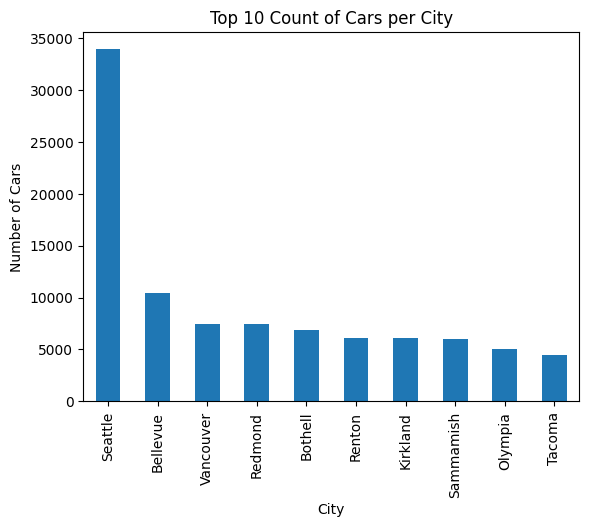

,count
City,
Seattle,33858
Bellevue,10414
Vancouver,7475
Redmond,7438
Bothell,6877
Renton,6132
Kirkland,6093
Sammamish,5995
Olympia,5079


In [35]:
#print(df['Base MSRP'].describe())
car_counts_Cty = df['City'].value_counts().nlargest(10)


car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()


car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')


<Axes: ylabel='count'>

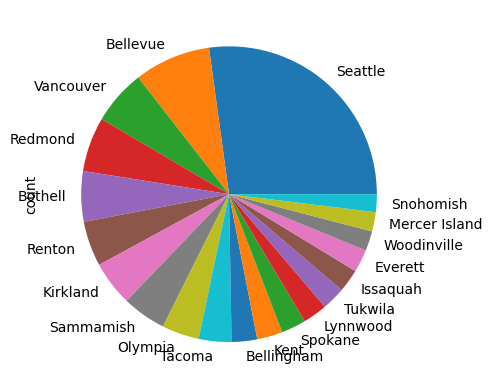

In [36]:
City_df = pd.DataFrame(df.City[:20].value_counts().sort_index())
cities_by_Electric_Range=df.City.value_counts()
cities_by_Electric_Range[:20].plot(kind='pie')

<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

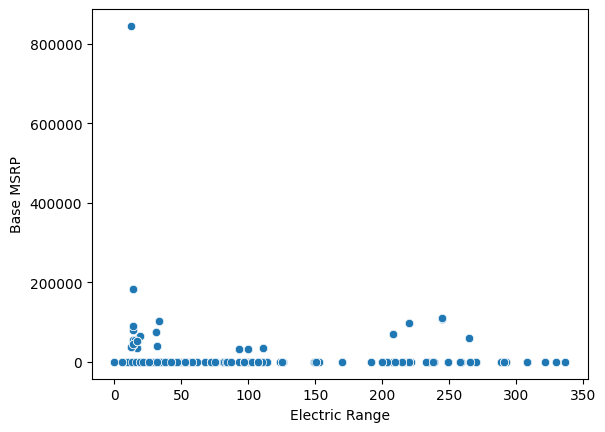

In [37]:
sns.scatterplot(data=df, x="Electric Range", y="Base MSRP")

<Axes: xlabel='Electric Range', ylabel='Model Year'>

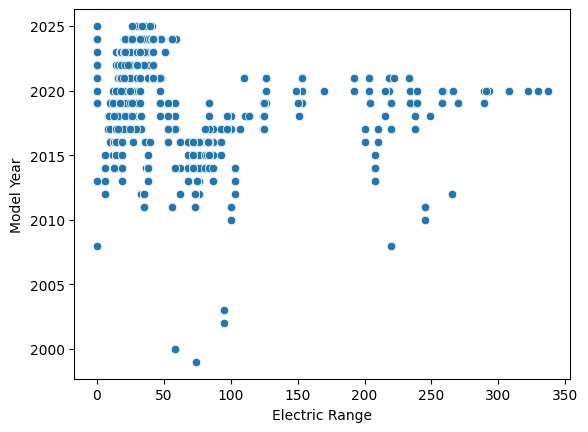

In [38]:
sns.scatterplot(data = df, x = 'Electric Range', y = 'Model Year')

<ipython-input-39-ca69afd0f82b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Count', palette='viridis')


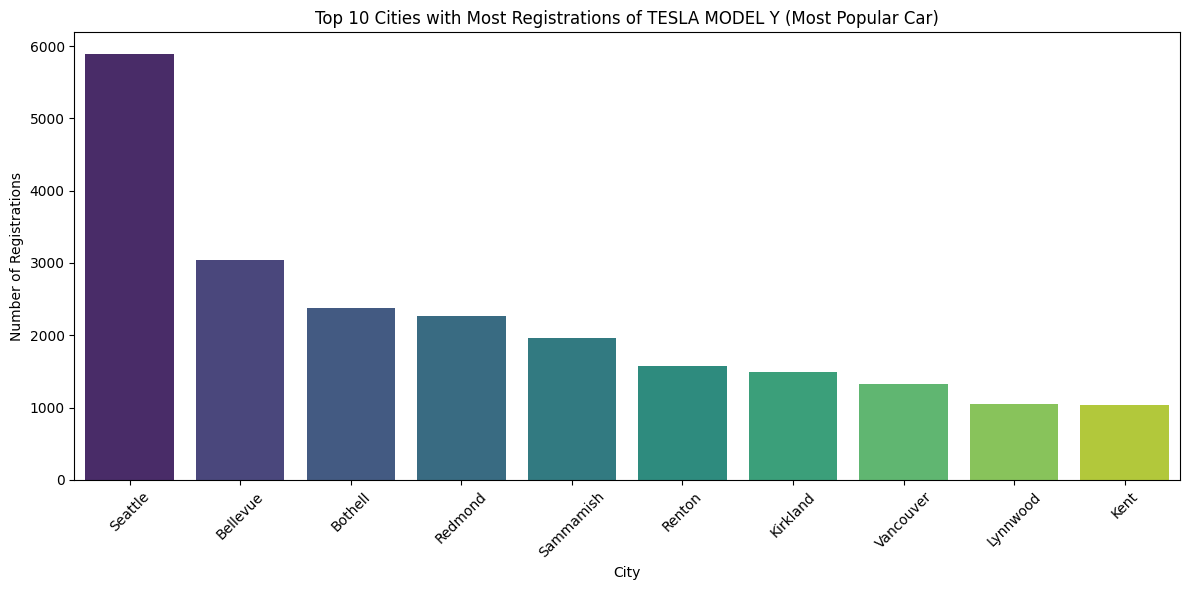

In [39]:
car_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Count')
most_popular_car = car_counts.loc[car_counts['Count'].idxmax()]
popular_car_make = most_popular_car['Make']
popular_car_model = most_popular_car['Model']
popular_car_registrations = df[(df['Make'] == popular_car_make) & (df['Model'] == popular_car_model)]
city_counts = popular_car_registrations['City'].value_counts().reset_index(name='Count')
city_counts.columns = ['City', 'Count']
top_cities = city_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Count', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Registrations')
plt.title(f'Top 10 Cities with Most Registrations of {popular_car_make} {popular_car_model} (Most Popular Car)')
plt.tight_layout()
plt.show()

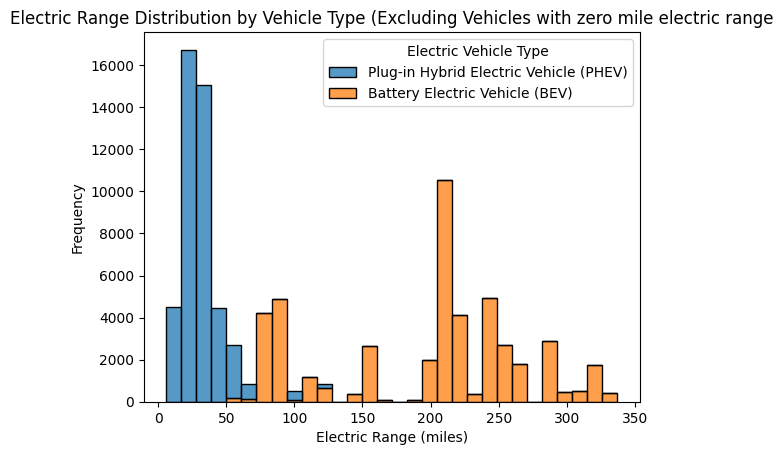

In [40]:
non_zero_range = df[df['Electric Range'] > 0]

sns.histplot(data=non_zero_range, x='Electric Range', hue='Electric Vehicle Type', bins=30, multiple='stack')
plt.title("Electric Range Distribution by Vehicle Type (Excluding Vehicles with zero mile electric range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()



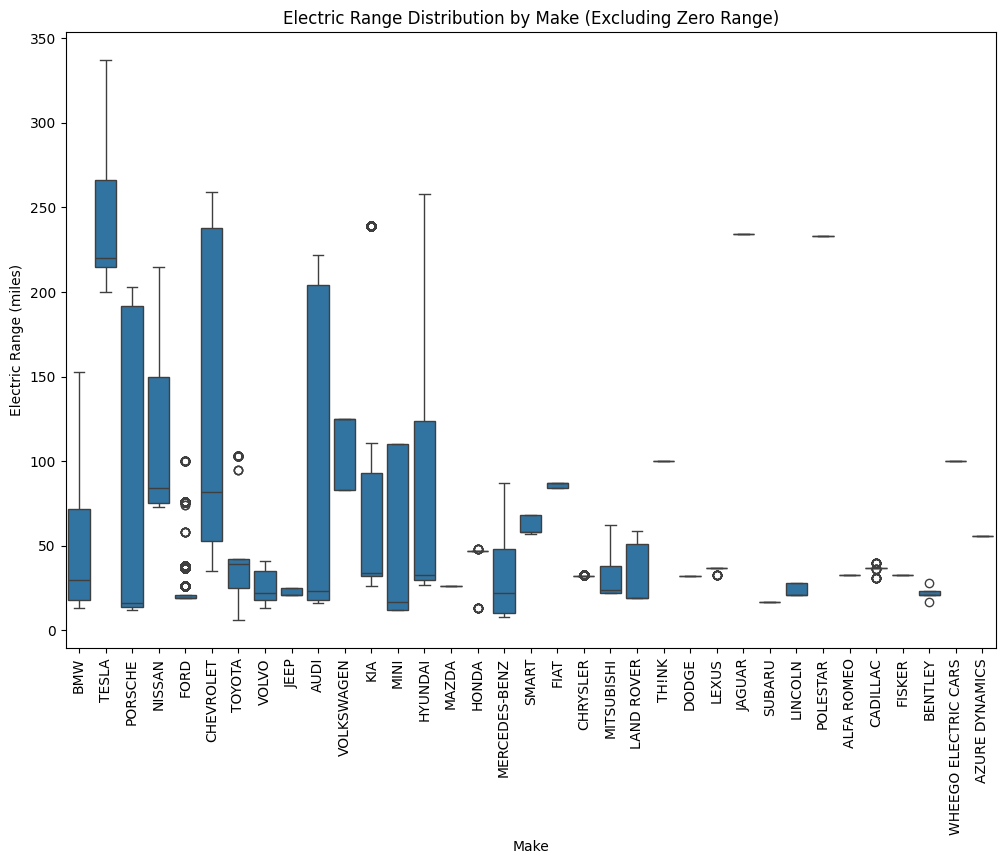

In [41]:
df_filtered = df[df['Electric Range'] > 0]

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_filtered, x='Make', y='Electric Range')
plt.title("Electric Range Distribution by Make (Excluding Zero Range)")
plt.xlabel("Make")
plt.ylabel("Electric Range (miles)")
plt.xticks(rotation=90)
plt.show()

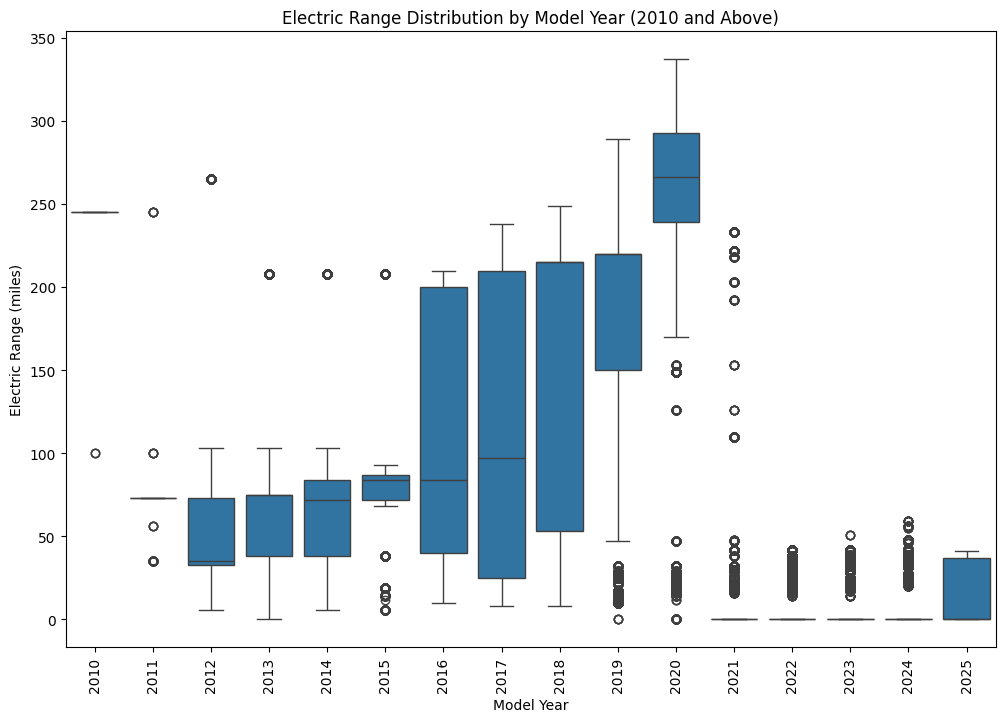

In [42]:
df_filtered = df[df['Model Year'] >= 2010]


plt.figure(figsize=(12, 8))

# Plot the boxplot for Electric Range by Model Year
sns.boxplot(data=df_filtered, x='Model Year', y='Electric Range')
plt.title("Electric Range Distribution by Model Year (2010 and Above)")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.xticks(rotation=90)
plt.show()


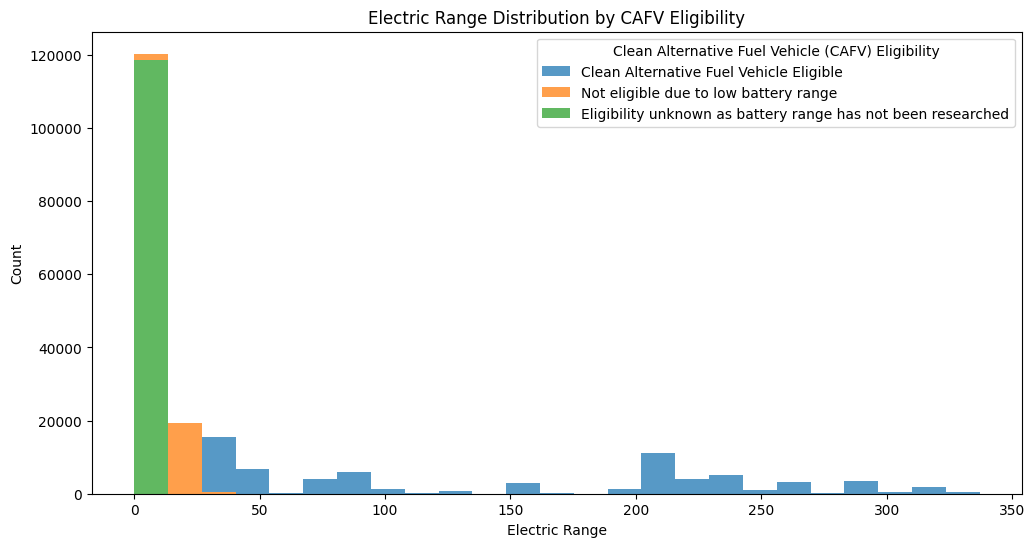

In [43]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df,
             x="Electric Range",
             hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility",
             multiple="stack",
             linewidth=0,bins = 25)


plt.title('Electric Range Distribution by CAFV Eligibility')
plt.xlabel('Electric Range')
plt.ylabel('Count')


plt.show()

<ipython-input-44-edb27f894391>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts.head(20), x='City', y='Count', palette='viridis')  # Display top 20 cities


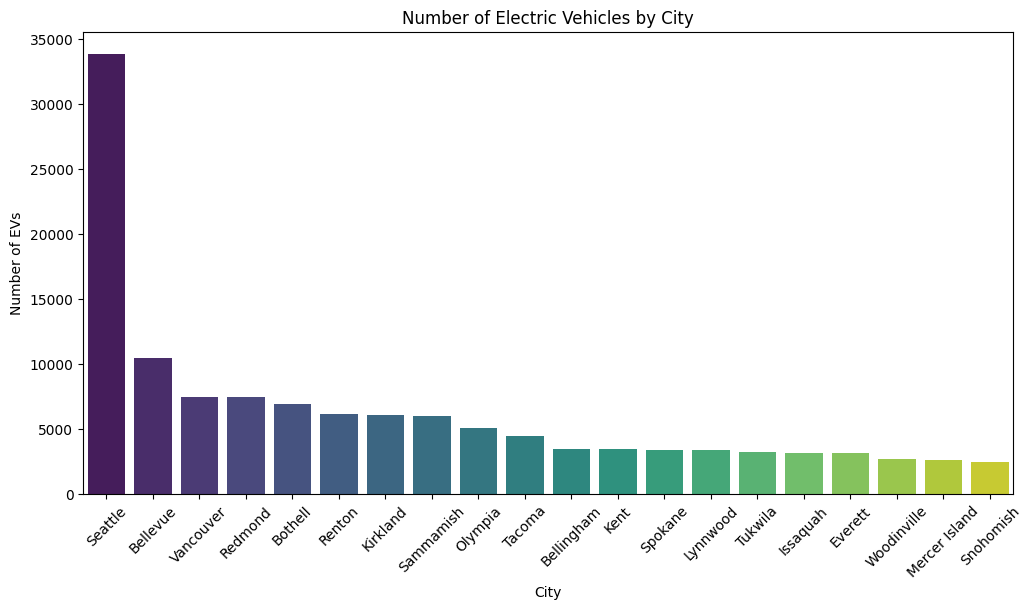

In [44]:
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=city_counts.head(20), x='City', y='Count', palette='viridis')  # Display top 20 cities
plt.title('Number of Electric Vehicles by City')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()

<ipython-input-45-488acc23cce3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_counts.head(20), x='County', y='Count', palette='magma')  # Display top 20 counties


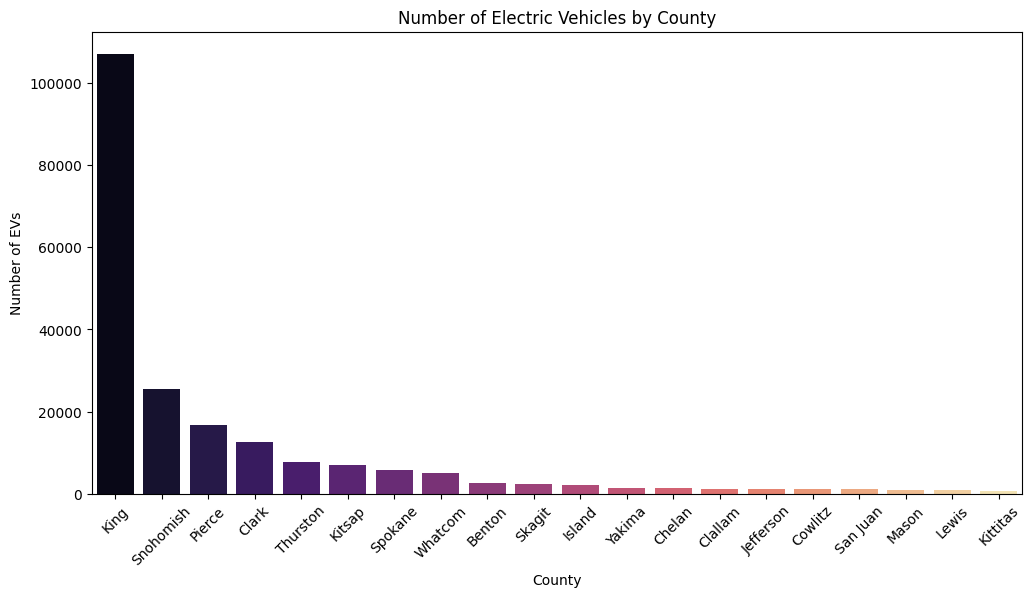

In [45]:
county_counts = df['County'].value_counts().reset_index()
county_counts.columns = ['County', 'Count']


plt.figure(figsize=(12, 6))
sns.barplot(data=county_counts.head(20), x='County', y='Count', palette='magma')  # Display top 20 counties
plt.title('Number of Electric Vehicles by County')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()


In [46]:
vehicle_counts = df['State'].value_counts().reset_index()
vehicle_counts.columns = ['State', 'Vehicle Count']

vehicle_counts.style.background_gradient(cmap='Blues')


,State,Vehicle Count
0,WA,209720
1,CA,113
2,VA,60
3,MD,37
4,TX,28
5,NC,19
6,CO,17
7,FL,12
8,GA,10
9,IL,10


In [47]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 45.3 MB/s eta 0:00:00


<ipython-input-48-4271518f1756>:23: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)


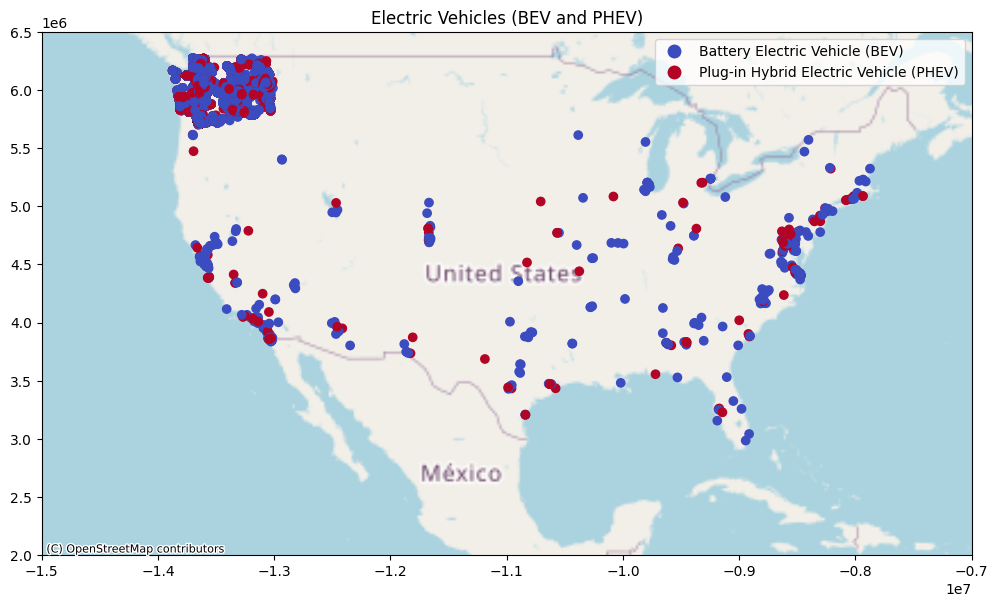

In [48]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Assuming df_evb['Vehicle Location'] contains WKT coordinates
data = df['Vehicle Location']
gs = gpd.GeoSeries.from_wkt(data)
gdf = gpd.GeoDataFrame(df, geometry=gs, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Plot all vehicles in one plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot all vehicle locations, using different colors for each vehicle type
gdf.plot(
    ax=ax,
    column='Electric Vehicle Type',
    cmap='coolwarm',
    legend=True,
    legend_kwds={'loc': 'upper right'}
)

gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# # Add state name labels (adjust parameters as needed)
# for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['State']):
#     ax.text(x, y, label, fontsize=8, ha='center', va='center')

ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('Electric Vehicles (BEV and PHEV)')

ax.set_xlim([-1.5e7, -0.7e7])  # Longitude range
ax.set_ylim([2e6, 6.5e6])    # Latitude range


plt.show()

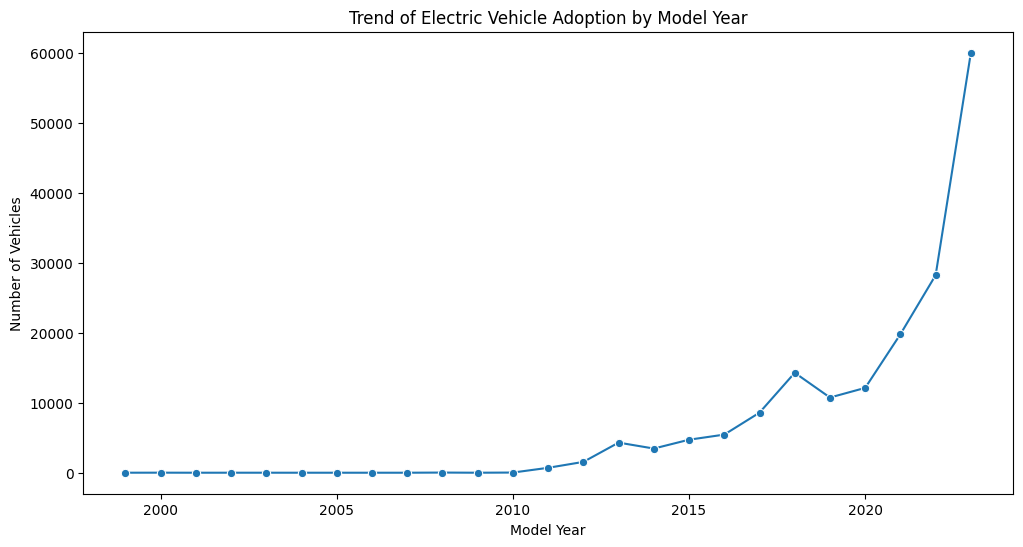

In [49]:
import numpy as np
df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")
years = np.arange(df['Model Year'].min(), 2024)
yearly_counts = df.groupby('Model Year').size().reindex(years, fill_value=0)


plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Trend of Electric Vehicle Adoption by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show()